# Solves the boundary problem using quasilinearisation method

## Aristova XI.9.3

![alt text](task.png)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Constants:
y0 = 0
y1 = 2

alpha = 0.2
h_alpha = 1e-2

eps = 1e-7
h = 1e-4

x_arr = np.arange(0.0, 1.0, h)

In [4]:
# Miscelaneous functions

def step(x, u0, du):
    res = u0 + du(x, u0) * h

    eps = 1e-4
    for i in range(1000):
        if abs(res - u0) <= eps:
            return res
        u0 = res
        res = u0 + du(x, u0) * h

    print("\nToo many iterations!")
    return res

def calcY(y0, alpha):
    y = y0
    dy = alpha

    ys = []

    print(f"y0 = {y0}, alpha = {alpha}:")

    for x in x_arr:
        print(f"\rCalculating... x = {x}", end="")
        ys.append(y)
        y += dy * h
        dy = step(x, dy, d2y)
    print()

    plt.plot(x_arr, ys)

    return ys

In [5]:
# Task-specific functions

def d2y(x, y):
    return x * np.sqrt(y)

def y(y_arr, x):
    idx = int(x / h)
    return y_arr[idx]

# p = df/dy'
def p(x):
    return 0

# q = df/dy
def q(x):
    return x / 2 / np.sqrt(y0)

# r = f(x, y0, y0') - y0''
def r(x):
    return d2y(x, y0) - d2y(0, y0)


## Linearization

\begin{equation}
\large
    \nu'' = p(x) \nu' + q(x) \nu + r(x)
    \\\\
\large
    \nu'' = \frac{\partial f(x, y_0, y_0')}{\partial y'} \nu' + \frac{\partial f(x, y_0, y_0')}{\partial y} \nu + f(x, y_0, y_0') - y_0''
\end{equation}

\begin{equation}
\large
\frac{\nu_{k+1}^{m+1} - 2\nu_{k}^{m+1} + \nu_{k-1}^{m+1}}{h^2} = x_k \cdot \sqrt{\nu^{m+1}} \\\\
\large
\frac{\nu_{k+1}^{m+1} - 2\nu_{k}^{m+1} + \nu_{k-1}^{m+1}}{h^2} = x_k \cdot \sqrt{\nu^{m}_k} + \frac{x_k}{2\sqrt{\nu^{m}_k}} \cdot (\nu^{m+1}_k - \nu^{m}_k) \\\\
\large
\nu_N^{m+1} = y(1) = 2
\end{equation}

New iteration
New iteration


Text(0.5, 0, 'Y')

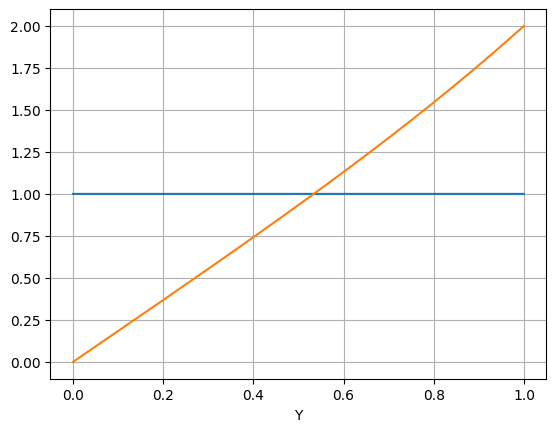

In [6]:
N = x_arr.size
y_arr = np.full(N + 1, 1.0)

# Coefficient matrix.
A = np.zeros((N + 1, N + 1))

# Ordinate
f = np.zeros(N + 1)

def FillMatrices(x_arr, y_arr):
    # Filling the matrix
    for k in range(1, N):
        xk = x_arr[k]
        yk = y(y_arr, xk)
        h2 = h**2

        # nu_{k-1}^{m+1}
        A[k][k - 1] = 1.0 / h2

        # nu_k^{m+1}
        A[k][k] = -2.0 / h2 - xk / 2.0 / np.sqrt(yk)

        # nu_{k+1}^{m+1}
        A[k][k + 1] = 1.0 / h2 

        f[k] = xk / 2.0 * np.sqrt(yk)

    # Boundary conditions
    A[0][0] = 1.0    
    A[N][N] = 1.0

    f[0] = y0
    f[N] = y1
    return A, f


# Computation
A, f = FillMatrices(x_arr, y_arr)
new = np.linalg.solve(A, f)

fig = plt.figure()

while np.max(np.abs(y_arr - new)) > eps:
    plt.plot(x_arr, y_arr[:-1])
    print("New iteration")
    y_arr = new
    A, f = FillMatrices(x_arr, y_arr)
    new = np.linalg.solve(A, f)

plt.grid()
plt.xlabel("X")
plt.xlabel("Y")